In [1]:
import sys
sys.path.append("..")
from lab1.dz1 import Matrix
import matplotlib.pyplot as plt
import numpy as np
from copy import copy
%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [74]:
#METHODS


def euler(T=None, t_max=None, x0=None, A=None, B=None, printing=5, outputFile="Euler", writeToFile=True, r=None):
    #print("starting euler, T={}, t_max={}, x0={}, A={}, B={}".format(T,t_max,x0,A,B))
    if writeToFile: file = open(outputFile, "w")

    if B is None:
        B = Matrix.fromArray([[0, 0], [0, 0]])
        
    if r is None:
        def r1(t):
            return 1
        def r2(t):
            return 1
        r = [r1, r2]


    def f(x, t):
        R = Matrix.fromArray([[r[0](t)], [r[1](t)]])
        return (A*x.getTranspose() + B*R).getTranspose()
    
    ts = np.arange(0,t_max + T, T)
    
    x = x0.copy()

    x1 = []
    x2 = []

    iters = 0
    for t in ts:
        x1.append(x[0][0])
        x2.append(x[0][1])


        line = "t={}, x={}".format(t, x)
        if writeToFile: file.write(line)
        
        if iters % printing == 0:
            print(line)
        x += f(x,t) * T

        iters += 1



    return x1, x2, ts




def backwardEuler(T=None, t_max=None, x0=None, A=None, B=None, printing=5, outputFile="backwardsEuler", 
                  writeToFile=True, r=None):
    #print("starting BACKRAWD euler, T={}, t_max={}, x0={}, A={}, B={}".format(T,t_max,x0,A,B))
    
    if writeToFile: file = open(outputFile, "w")

    if B is None:
        B = Matrix.fromArray([[0, 0], [0, 0]])
        
    if r is None:
        def r1(t):
            return 1
        def r2(t):
            return 1
        r = [r1, r2]
        
   

        
    P = (Matrix.identity(2) - A*T).inv()
    Q = P * T * B
    
    def f(x,t):
        R = Matrix.fromArray([[r[0](t+T)], [r[1](t+T)]])
        return (P * x.getTranspose() + Q*R).getTranspose()
    
    ts = np.arange(0,t_max + T, T)
    
    x = x0.copy()

    x1 = []
    x2 = []

    iters = 0
    for t in ts:

        x1.append(x[0][0])
        x2.append(x[0][1])


        line = "t={}, x={}".format(t, x)
        if writeToFile: file.write(line)
        if iters % printing == 0:
            print(line)
        x = f(x,t)

        iters += 1



    return x1, x2, ts




def trapez(T=None, t_max=None, x0=None, A=None, B=None, printing=1, outputFile="trapez", writeToFile=True, r=None):
    #print("starting TRAPEZ, T={}, t_max={}, x0={}, A={}, B={}".format(T,t_max,x0,A,B))
    
    if writeToFile: file = open(outputFile, "w")

    if B is None:
        B = Matrix.fromArray([[0, 0], [0, 0]])
        
    if r is None:
        def r1(t):
            return 1
        def r2(t):
            return 1
        r = [r1, r2]
        
    U = Matrix.identity(2)
    _R = (U - A*(T/2)).inv()
    R = _R * (U + A*(T/2))
    S = _R * (T/2) * B
    
    
    
    def f(x,t):
        Rr = Matrix.fromArray([[r[0](t)+r[0](t+T)], [r[1](t)+r[1](t+T)]])
        return (R * x.getTranspose() + S*Rr).getTranspose()

    ts = np.arange(0,t_max + T, T)
    
    x = x0.copy()

    x1 = []
    x2 = []

    iters = 0
    for t in ts:
        x1.append(x[0][0])
        x2.append(x[0][1])


        line = "t={}, x={}".format(t, x)
        if writeToFile: file.write(line)
        if iters % printing == 0:
            print(line)
        x = f(x, t)

        iters += 1



    return x1, x2, ts



def rungeKutta4(T=None, t_max=None, x0=None, A=None, B=None, printing=1, outputFile="runge",
                writeToFile=True, r=None):
    #print("starting runge, T={}, t_max={}, x0={}, A={}, B={}".format(T,t_max,x0,A,B))
    
    if writeToFile: file = open(outputFile, "w")

    if B is None:
        B = Matrix.fromArray([[0,0], [0,0]])
        
    if r is None:
        def r1(t):
            return 1
        def r2(t):
            return 1
        r = [r1, r2]
        
    def f(x,t):
        R = Matrix.fromArray([[r[0](t)], [r[1](t)]])
        return A*x.getTranspose() + B*R

        
    ts = np.arange(0,t_max + T, T)
    
    x = x0.copy()

    x1 = []
    x2 = []

    iters = 0
    for t in ts:
        x1.append(x[0][0])
        x2.append(x[0][1])


        line = "t={}, x={}".format(t, x)
        if writeToFile: file.write(line)
        if iters % printing == 0:
            print(line)
            
        m1 = f(x, t).getTranspose()
        m2 = f(x + m1*(T/2), t+T/2).getTranspose()
        m3 = f(x + m2*(T/2), t+T/2).getTranspose()
        m4 = f(x + m3*T, t+T).getTranspose()
        x += (m1 + m2*2 + m3*2 + m4) * (T/6)

        iters += 1



    return x1, x2, ts




def PECE(T=None, t_max=None, x0=None, A=None, B=None, printing=1, outputFile="PECE", predictor="euler",
         corector="trapez", n=1, r=None):
    #print("starting PECE, T={}, t_max={}, x0={}, A={}, B={}".format(T,t_max,x0,A,B))
    
    file = open(outputFile, "w")

    if B is None:
        B = Matrix.fromArray([[0, 0], [0, 0]])
        
        
    if r is None:
        def r1(t):
            return 1
        def r2(t):
            return 1
        r = [r1, r2]
        
        
    def f(x,t):
        R = Matrix.fromArray([[r[0](t)], [r[1](t)]])
        return (A * x.getTranspose() + B*R).getTranspose()
    
    def f_c(x, xp, t):
        if corector == "trapez":
            return x + (f(x, t) + f(xp, t+T))*(T/2)
        elif corector == "backwardEuler":
            return x + f(xp, t+T)*T
    
        
    ts = np.arange(0,t_max + T, T)
    
    x = x0.copy()
    
    x1 = []
    x2 = []

    iters = 0
    
    for t in ts:
        x1.append(x[0][0])
        x2.append(x[0][1])


        line = "PECE t={}, x={}".format(t, x)
        file.write(line)
        if iters % printing == 0:
            print(line)
        
        xp = x + f(x, t)*T
        
        
        xc = f_c(x, xp, t)
        
        for i in range(n-1):
            xc = f_c(x, xp, t)

        
        
        x = xc.copy()
                
        
        iters += 1
    
    return x1, x2, ts
    






method=euler

t=0.0, x=1 1

t=1.0, x=1.388709198864032 -0.30263193019932916

t=2.0, x=0.4981958315789182 -1.3387313222544912

t=3.0, x=-0.861586089036513 -1.148292379113695

t=4.0, x=-1.4389515976426452 0.10505086894000314

t=5.0, x=-0.6925678828131816 1.273925690316826

t=6.0, x=0.7012303404363228 1.277475139545681

t=7.0, x=1.4611182888577345 0.10070849730888863

t=8.0, x=0.8786098919516702 -1.1809361233416014

t=9.0, x=-0.521563802265817 -1.3843084629830518

t=10.0, x=-1.4538982142764794 -0.3106618221316094


method=euler, x1_error=22.42969461702743, x2_error=23.64800341217901


method=backwardEuler

t=0.0, x=1 1

t=1.0, x=1.374891998861273 -0.29962084198143213

t=2.0, x=0.48833138145919386 -1.3122239781238918

t=3.0, x=-0.8361236259738973 -1.1143568819413108

t=4.0, x=-1.3825322633438444 0.10093196730160509

t=5.0, x=-0.6587925954656938 1.2117986305475765

t=6.0, x=0.6603958455486271 1.2030843879668505

t=7.0, x=1.3623424305547953 0.09390030913141868

t=8.0, x=0.8110623973844059 -

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


t=1.0, x=1.3817732907001727 -0.30116867882440396

t=2.0, x=0.49315059049875387 -1.325444263288795

t=3.0, x=-0.8488724882560419 -1.1311125048701667

t=4.0, x=-1.410446116202006 0.1031588739738983

t=5.0, x=-0.6752620897152928 1.2425864598407008

t=6.0, x=0.6807547878288331 1.2395857851844914

t=7.0, x=1.4108888529987025 0.09691565644703279

t=8.0, x=0.8438582135666236 -1.134858279863138

t=9.0, x=-0.499011775647401 -1.323248747492407

t=10.0, x=-1.38309263971035 -0.29505041933756837


method=rungeKutta4, x1_error=3.8759747999703165e-07, x2_error=3.676112725892189e-07


PECE, corector=backwardEuler

PECE t=0.0, x=1 1

PECE t=1.0, x=1.3748620299714112 -0.2997583296979737

PECE t=2.0, x=0.48806892694749915 -1.3123216182862911

PECE t=3.0, x=-0.8364578955333778 -1.1141059948783443

PECE t=4.0, x=-1.3824917802319288 0.10148497213793745

PECE t=5.0, x=-0.6581866139911444 1.212127875659802

PECE t=6.0, x=0.6611175774651908 1.2026879342889298

PECE t=7.0, x=1.3624078274687972 0.092946646534868

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


PECE t=2.0, x=0.49310653313125447 -1.3254610318615654

PECE t=3.0, x=-0.848929359756482 -1.131070485046803

PECE t=4.0, x=-1.410439941205231 0.1032529527615687

PECE t=5.0, x=-0.6751589630646305 1.2426435026165195

PECE t=6.0, x=0.6808792505665054 1.2395186348539655

PECE t=7.0, x=1.4109013844862035 0.09675114086133671

PECE t=8.0, x=0.8437077391242227 -1.1349719163688077

PECE t=9.0, x=-0.4992108139977177 -1.323175371291647

PECE t=10.0, x=-1.3831435232798397 -0.2948202740912988


PECE, corector=trapez, x1_error=0.07751048744315713, x2_error=0.0735294987115902



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:82: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


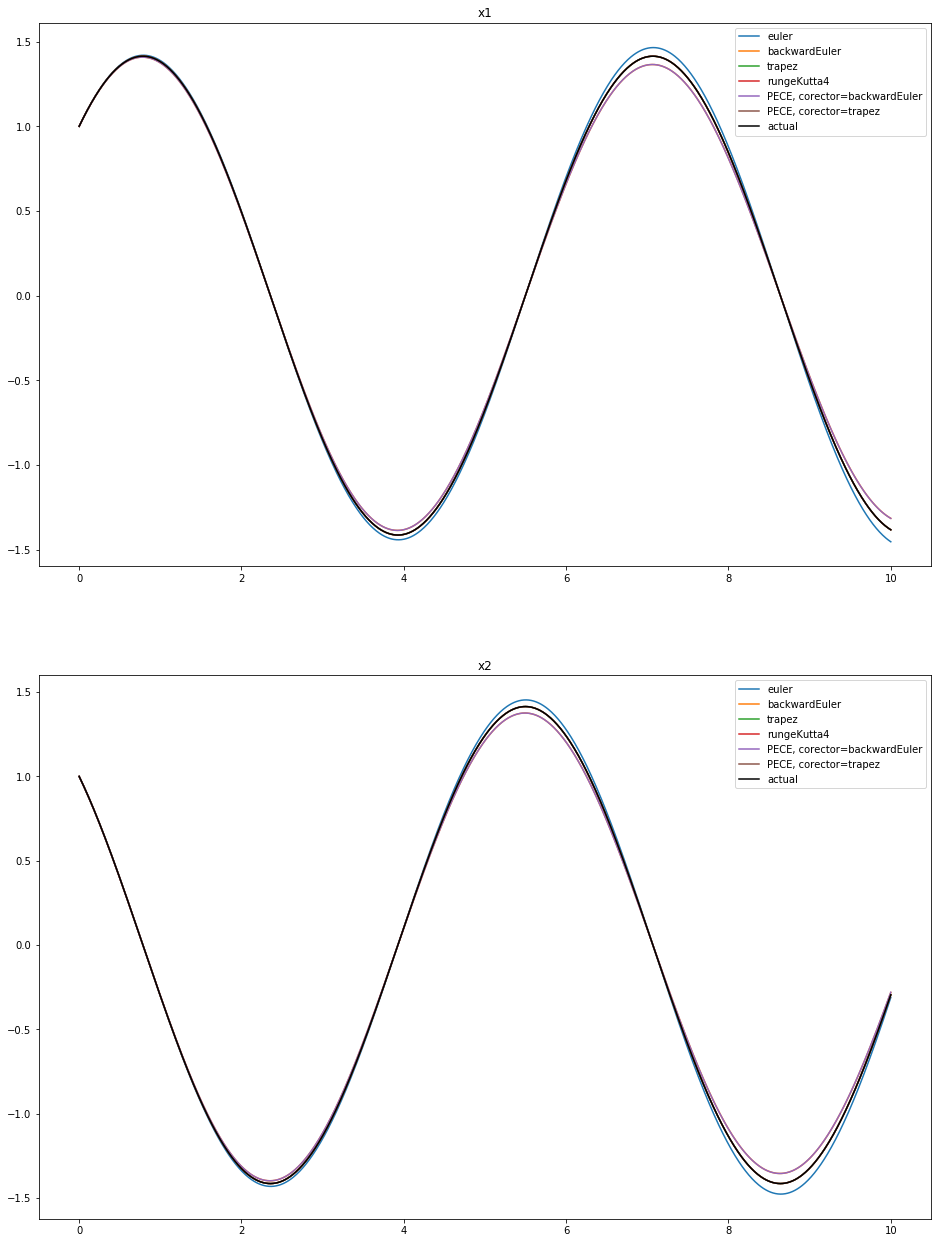

In [67]:
#ZAD1
plt.figure(figsize=(16,22))
A = Matrix.fromArray([[0, 1], [-1, 0]])
x0 = Matrix.fromArray([[1,1]])
t_max = 10
T = 0.01

def fx1(t):
    return x0[0][0] * cos(t) + x0[0][1]*sin(t)

def fx2(t):
    return x0[0][1] * cos(t) - x0[0][0]*sin(t)


tss = np.arange(0,t_max + T, T)


x1_actual = [fx1(t) for t in tss]
x2_actual = [fx2(t) for t in tss]




methods = [euler, backwardEuler, trapez, rungeKutta4]
corectors = ["backwardEuler", "trapez"]
ns = [2, 1]

for m in methods:
    print("\nmethod={}\n".format(m.__name__))
    
    x1, x2, ts = m(T, t_max, x0, A, printing=100, outputFile="zadatak1-{}".format(m.__name__))
    
    
    x1_error = sum([abs(x1m - x1a) for (x1m,x1a) in zip(x1,x1_actual)])
    x2_error = sum([abs(x2m - x2a) for (x2m,x2a) in zip(x2,x2_actual)])
    
    print("\nmethod={}, x1_error={}, x2_error={}\n".format(m.__name__, x1_error, x2_error))
    
    plt.subplot(2,1,1)
    plt.title("x1")
    plt.plot(tss, x1, label="{}".format(m.__name__))
    plt.legend()
    
    
    plt.subplot(2,1,2)
    plt.title("x2")
    plt.plot(tss, x2, label="{}".format(m.__name__))
    plt.legend()

for c,n in zip(corectors, ns):
    name = "PECE, corector={}".format(c)
    print("\n{}\n".format(name))
    
    x1, x2, ts = PECE(T, t_max, x0, A, printing=100, corector=c, n=n,
                      outputFile="zadatak1-{}".format(name))
    
    
    x1_error = sum([abs(x1m - x1a) for (x1m,x1a) in zip(x1,x1_actual)])
    x2_error = sum([abs(x2m - x2a) for (x2m,x2a) in zip(x2,x2_actual)])
    
    print("\n{}, x1_error={}, x2_error={}\n".format(name, x1_error, x2_error))
    
    plt.subplot(2,1,1)
    plt.title("x1")
    plt.plot(tss, x1, label="{}".format(name))
    plt.legend()
    
    
    plt.subplot(2,1,2)
    plt.title("x2")
    plt.plot(tss, x2, label="{}".format(name))
    plt.legend()


    
plt.subplot(2,1,1)
plt.title("x1")
plt.plot(tss, x1_actual, label="actual", color="black")
plt.legend()

    
plt.subplot(2,1,2)
plt.title("x2")
plt.plot(tss, x2_actual, label="actual", color="black")
plt.legend()


method=euler

t=0.0, x=1 -2

t=0.1, x=0.8170728068875469 -1.634145613775094

t=0.2, x=0.6676079717550945 -1.335215943510189

t=0.3, x=0.5454843193824371 -1.0909686387648743

t=0.4, x=0.445700403950951 -0.891400807901902

t=0.5, x=0.364169680087117 -0.7283393601742341

t=0.6, x=0.2975531426921207 -0.5951062853842414

t=0.7000000000000001, x=0.2431225814976618 -0.4862451629953236

t=0.8, x=0.19864885008204092 -0.3972977001640819

t=0.9, x=0.16231057352151668 -0.3246211470430334

t=1.0, x=0.13261955589475316 -0.2652391117895063


method=backwardEuler

t=0.0, x=1 -2

t=0.1, x=0.8203482998751537 -1.6406965997503078

t=0.2, x=0.6729713331080553 -1.345942666216111

t=0.3, x=0.5520708889799089 -1.1041417779598182

t=0.4, x=0.4528904151852331 -0.9057808303704664

t=0.5, x=0.37152788212695875 -0.7430557642539175

t=0.6, x=0.30478226645906725 -0.6095645329181346

t=0.7000000000000001, x=0.250027614121792 -0.5000552282435842

t=0.8, x=0.20510972816665318 -0.4102194563333065

t=0.9, x=0.1682614167

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,


PECE, corector=backwardEuler

PECE t=0.0, x=1 -2

PECE t=0.1, x=0.8204139301017987 -1.6408278602035975

PECE t=0.2, x=0.6730790167050792 -1.3461580334101588

PECE t=0.3, x=0.5522034013640683 -1.1044068027281373

PECE t=0.4, x=0.4530353627286764 -0.9060707254573532

PECE t=0.5, x=0.37167652241132737 -0.7433530448226549

PECE t=0.6, x=0.3049285964780464 -0.6098571929560929

PECE t=0.7000000000000001, x=0.2501676682369796 -0.5003353364739593

PECE t=0.8, x=0.20524103988270337 -0.41048207976540685

PECE t=0.9, x=0.16838260814834868 -0.3367652162966976

PECE t=1.0, x=0.13814343731177794 -0.2762868746235561


PECE, corector=trapez

PECE t=0.0, x=1 -2

PECE t=0.1, x=0.8187418346189461 -1.6374836692378922

PECE t=0.2, x=0.6703381917551977 -1.3406763835103952

PECE t=0.3, x=0.5488339209327975 -1.097667841865595

PECE t=0.4, x=0.44935329132562807 -0.8987065826512562

PECE t=0.5, x=0.3679043381320065 -0.735808676264013

PECE t=0.6, x=0.301218672766468 -0.602437345532936

PECE t=0.700000000000000

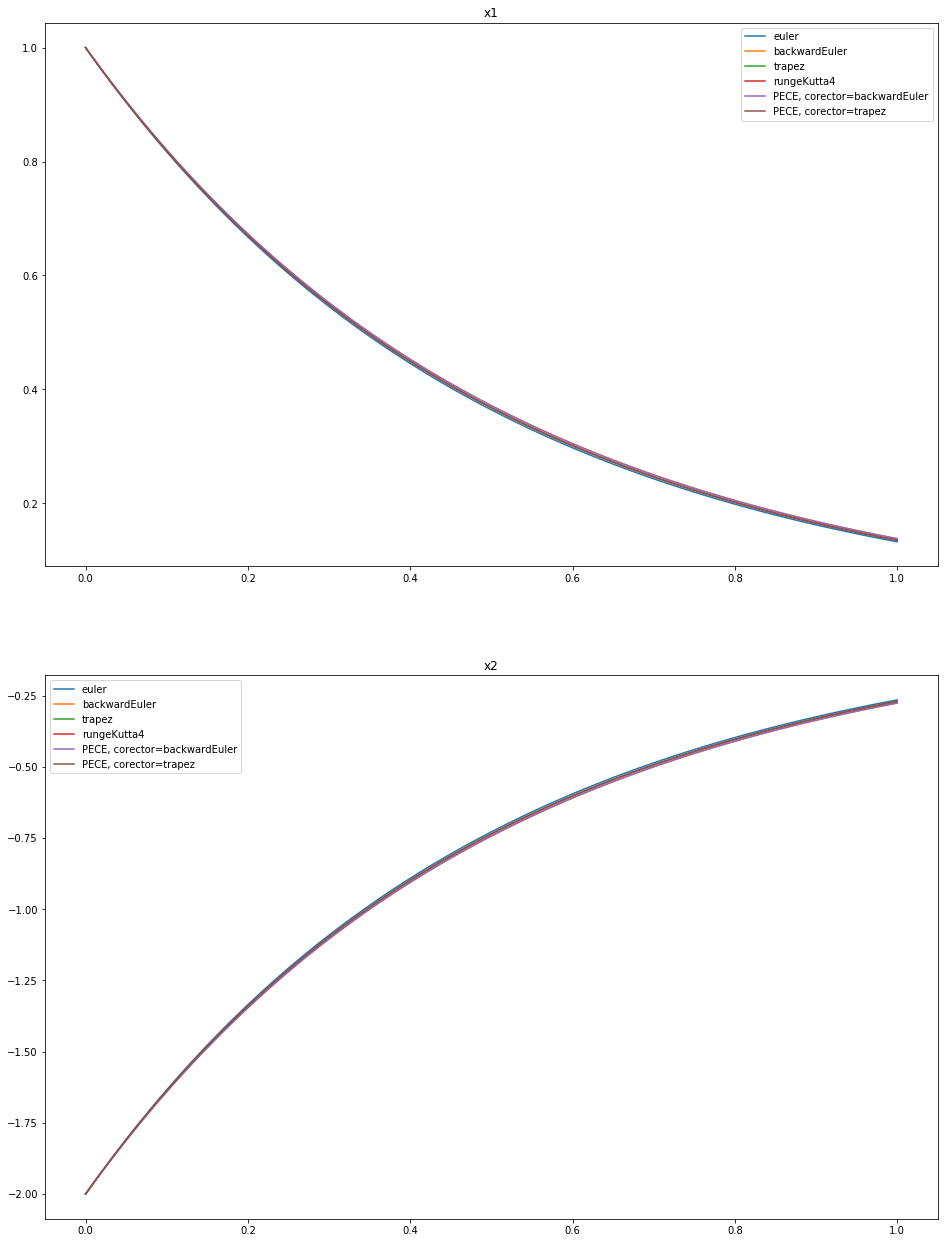

In [68]:
#ZAD2
plt.figure(figsize=(16,22))
A = Matrix.fromArray([[0, 1], [-200, -102]])
x0 = Matrix.fromArray([[1,-2]])
t_max = 1
T = 0.01
printing = 10

tss = np.arange(0,t_max + T, T)



methods = [euler, backwardEuler, trapez, rungeKutta4]
corectors = ["backwardEuler", "trapez"]

for m in methods:
    print("\nmethod={}\n".format(m.__name__))
    
    x1, x2, ts = m(T, t_max, x0, A, printing=printing, outputFile="zadatak2-{}".format(m.__name__))
    
    
    x1_error = sum([abs(x1m - x1a) for (x1m,x1a) in zip(x1,x1_actual)])
    x2_error = sum([abs(x2m - x2a) for (x2m,x2a) in zip(x2,x2_actual)])
    
    plt.subplot(2,1,1)
    plt.title("x1")
    plt.plot(tss, x1, label="{}".format(m.__name__))
    plt.legend()
    
    
    plt.subplot(2,1,2)
    plt.title("x2")
    plt.plot(tss, x2, label="{}".format(m.__name__))
    plt.legend()
    
    
for c,n in zip(corectors, ns):
    name = "PECE, corector={}".format(c)
    print("\n{}\n".format(name))
    
    x1, x2, ts = PECE(T, t_max, x0, A, printing=printing, corector=c, n=n,
                      outputFile="zadatak2-{}".format(name))
    
    
    x1_error = sum([abs(x1m - x1a) for (x1m,x1a) in zip(x1,x1_actual)])
    x2_error = sum([abs(x2m - x2a) for (x2m,x2a) in zip(x2,x2_actual)])
    
    plt.subplot(2,1,1)
    plt.title("x1")
    plt.plot(tss, x1, label="{}".format(name))
    plt.legend()
    
    
    plt.subplot(2,1,2)
    plt.title("x2")
    plt.plot(tss, x2, label="{}".format(name))
    plt.legend()
    



method=euler

t=0.0, x=1 3

t=1.0, x=-0.3342060148622001 1.03182632641103

t=2.0, x=-0.21519550989875955 0.9187841649592027

t=3.0, x=-0.09108427113871778 0.9579566229325683

t=4.0, x=-0.03497309895267362 0.9829774543223719

t=5.0, x=-0.013017894129393302 0.9935525889130217

t=6.0, x=-0.004793696834549489 0.997611312456762

t=7.0, x=-0.0017584577803843615 0.9991218534012983

t=8.0, x=-0.0006441576597269778 0.9996780647031535

t=9.0, x=-0.000235849541221335 0.999882094264674

t=10.0, x=-8.633744591910842e-05 0.9999568338014915


method=backwardEuler

t=0.0, x=1 3

t=1.0, x=-0.3253235230650047 1.0443876892641213

t=2.0, x=-0.2162134609434959 0.9204729195783733

t=3.0, x=-0.0931791071074564 0.9573553803441635

t=4.0, x=-0.03627727137768885 0.9824058952424808

t=5.0, x=-0.013664425922216717 0.9932429502590734

t=6.0, x=-0.005086718839384774 0.9974670155826133

t=7.0, x=-0.0018854243135414638 0.9990587199355824

t=8.0, x=-0.0006977260780007752 0.9996513346369561

t=9.0, x=-0.00025804874860

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


t=2.0, x=-0.2157236495545354 0.9196116337048217

t=3.0, x=-0.09213788017034043 0.9576491882100743

t=4.0, x=-0.035624889895157996 0.9826907489997323

t=5.0, x=-0.013339694212698955 0.9933982527892173

t=6.0, x=-0.0049390717184723 0.9975396804594436

t=7.0, x=-0.0018212693459770139 0.9990906126201139

t=8.0, x=-0.0006705876507244981 0.9996648749774034

t=9.0, x=-0.0002467739184196043 0.9998766358857603

t=10.0, x=-9.079367614032843e-05 0.9999546062536603


PECE, corector=backwardEuler

PECE t=0.0, x=1 3

PECE t=1.0, x=-0.325066058625631 1.0446821266548514

PECE t=2.0, x=-0.21617661321948062 0.9205371072987295

PECE t=3.0, x=-0.09319047398552567 0.9573591760790255

PECE t=4.0, x=-0.036288730327287265 0.9824019110506437

PECE t=5.0, x=-0.013670732514509853 0.9932400982167084

PECE t=6.0, x=-0.005089684399640807 0.997465582722008

PECE t=7.0, x=-0.0018867304932030004 0.9990580748879337

PECE t=8.0, x=-0.0006982822599672704 0.9996510578151512

PECE t=9.0, x=-0.0002582807517120068 0.99987088

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


PECE t=3.0, x=-0.09213987643842499 0.9576497000908615

PECE t=4.0, x=-0.035626805447254245 0.9826900637198395

PECE t=5.0, x=-0.013340733499724483 0.9933977792467553

PECE t=6.0, x=-0.004939556249721131 0.9975394456812446

PECE t=7.0, x=-0.0018214813675827529 0.9990905077915893

PECE t=8.0, x=-0.0006706774208891172 0.9996648302751949

PECE t=9.0, x=-0.0002468111670857463 0.999876617289272

PECE t=10.0, x=-9.08089162328938e-05 0.9999545986378016



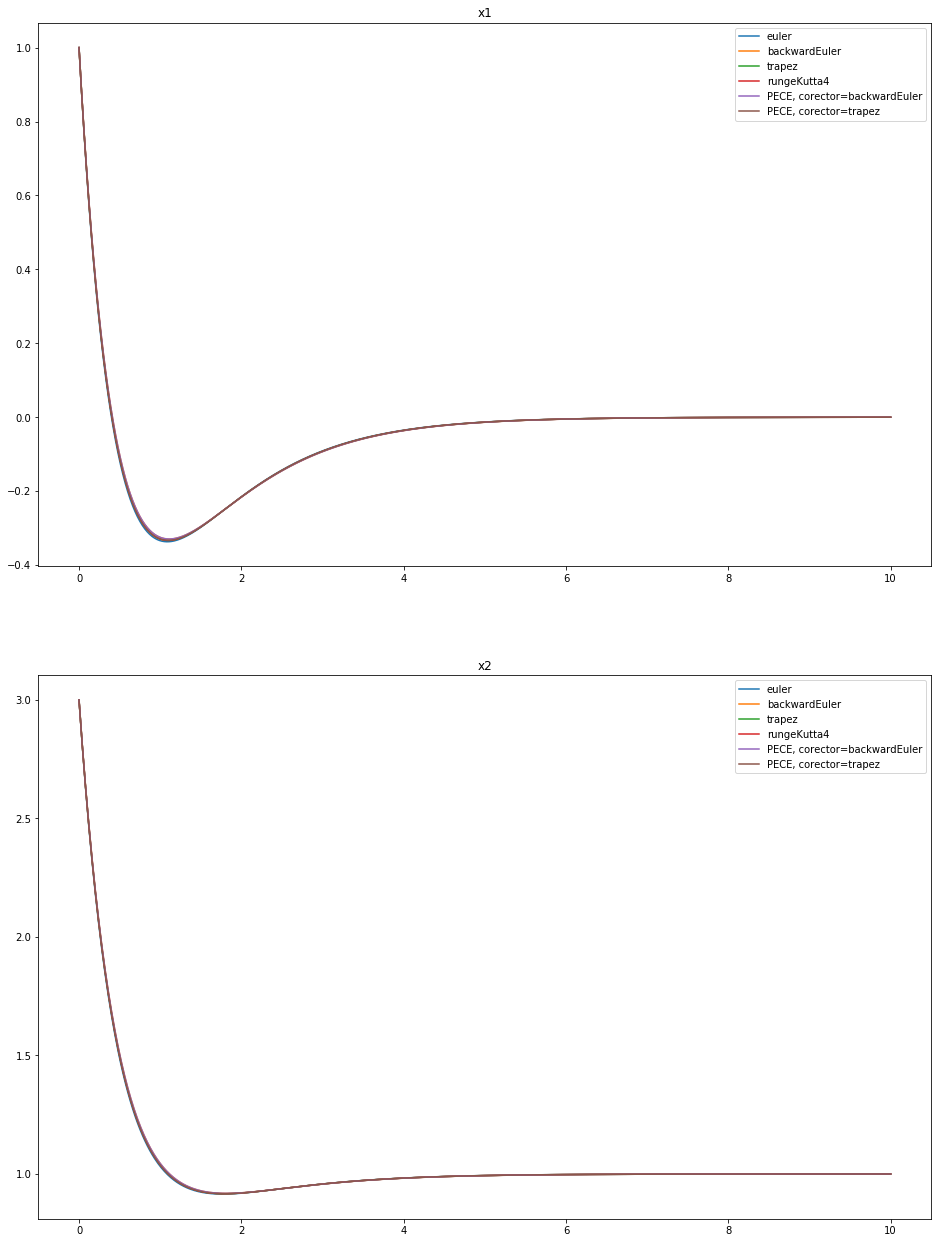

In [72]:
#ZAD3
plt.figure(figsize=(16,22))
A = Matrix.fromArray([[0, -2], [1, -3]])
B = Matrix.fromArray([[2, 0], [0, 3]])
x0 = Matrix.fromArray([[1, 3]])
t_max = 10
T = 0.01
printing = 100

tss = np.arange(0,t_max + T, T)



methods = [euler, backwardEuler, trapez, rungeKutta4]
corectors = ["backwardEuler", "trapez"]

for m in methods:
    print("\nmethod={}\n".format(m.__name__))
    
    x1, x2, ts = m(T, t_max, x0, A, B, printing=printing, outputFile="zadatak3-{}".format(m.__name__))
    
    
    x1_error = sum([abs(x1m - x1a) for (x1m,x1a) in zip(x1,x1_actual)])
    x2_error = sum([abs(x2m - x2a) for (x2m,x2a) in zip(x2,x2_actual)])
    
    plt.subplot(2,1,1)
    plt.title("x1")
    plt.plot(tss, x1, label="{}".format(m.__name__))
    plt.legend()
    
    
    plt.subplot(2,1,2)
    plt.title("x2")
    plt.plot(tss, x2, label="{}".format(m.__name__))
    plt.legend()
    
    
for c,n in zip(corectors, ns):
    name = "PECE, corector={}".format(c)
    print("\n{}\n".format(name))
    
    x1, x2, ts = PECE(T, t_max, x0, A, B, printing=printing, corector=c, n=n,
                      outputFile="zadatak3-{}".format(name))
    
    
    x1_error = sum([abs(x1m - x1a) for (x1m,x1a) in zip(x1,x1_actual)])
    x2_error = sum([abs(x2m - x2a) for (x2m,x2a) in zip(x2,x2_actual)])
    
    plt.subplot(2,1,1)
    plt.title("x1")
    plt.plot(tss, x1, label="{}".format(name))
    plt.legend()
    
    
    plt.subplot(2,1,2)
    plt.title("x2")
    plt.plot(tss, x2, label="{}".format(name))
    plt.legend()


method=euler

t=0.0, x=-1 3

t=0.1, x=-2.2197478531377746 1.3388733613233255

t=0.2, x=-2.8563764799921723 0.49122801381724784

t=0.3, x=-3.1740027165221774 0.06929655206399454

t=0.4, x=-3.3096712728525253 -0.12878168303046222

t=0.5, x=-3.3342388275634334 -0.20805513792331828

t=0.6, x=-3.284078620225286 -0.22315552930134863

t=0.7000000000000001, x=-3.177589941606597 -0.2024579981944339

t=0.8, x=-3.0237948301574606 -0.1606623206704725

t=0.9, x=-2.826814201606677 -0.10534443673999463

t=1.0, x=-2.588198195104832 -0.04036804884961953


method=backwardEuler

t=0.0, x=-1 3

t=0.1, x=-2.1655867292402986 1.4141350267685104

t=0.2, x=-2.7958025831920192 0.5716230455389092

t=0.3, x=-3.1210483613876985 0.13402176988672773

t=0.4, x=-3.2657210292123766 -0.08203462914237268

t=0.5, x=-3.296749569633087 -0.1758605865775187

t=0.6, x=-3.249900247578221 -0.2012136769527234

t=0.7000000000000001, x=-3.1440331877887027 -0.18715804860710972

t=0.8, x=-2.988828714907537 -0.14937204410152974

t=0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,


PECE, corector=backwardEuler

PECE t=0.0, x=-1 3

PECE t=0.1, x=-2.162303086934081 1.4189527079913942

PECE t=0.2, x=-2.792248048073629 0.5768505913515771

PECE t=0.3, x=-3.1181694010160497 0.13827504496691642

PECE t=0.4, x=-3.2636578143130963 -0.07895984476041723

PECE t=0.5, x=-3.2953756720099587 -0.17377834916650883

PECE t=0.6, x=-3.24903734284146 -0.19986205712224628

PECE t=0.7000000000000001, x=-3.1435251453760755 -0.18630754717622297

PECE t=0.8, x=-2.9885587834336604 -0.14885073786849884

PECE t=0.9, x=-2.7888620188799407 -0.095965605570438

PECE t=1.0, x=-2.5464260879481144 -0.03217786865130677


PECE, corector=trapez

PECE t=0.0, x=-1 3

PECE t=0.1, x=-2.1912858022744577 1.3785321287523236

PECE t=0.2, x=-2.8248970898879633 0.533183707367657

PECE t=0.3, x=-3.1467985871039836 0.10274359895428815

PECE t=0.4, x=-3.2873446493452922 -0.1048651265406201

PECE t=0.5, x=-3.315376110972583 -0.1917477894255084

PECE t=0.6, x=-3.2669961346439393 -0.21214789118039054

PECE t=0.70000

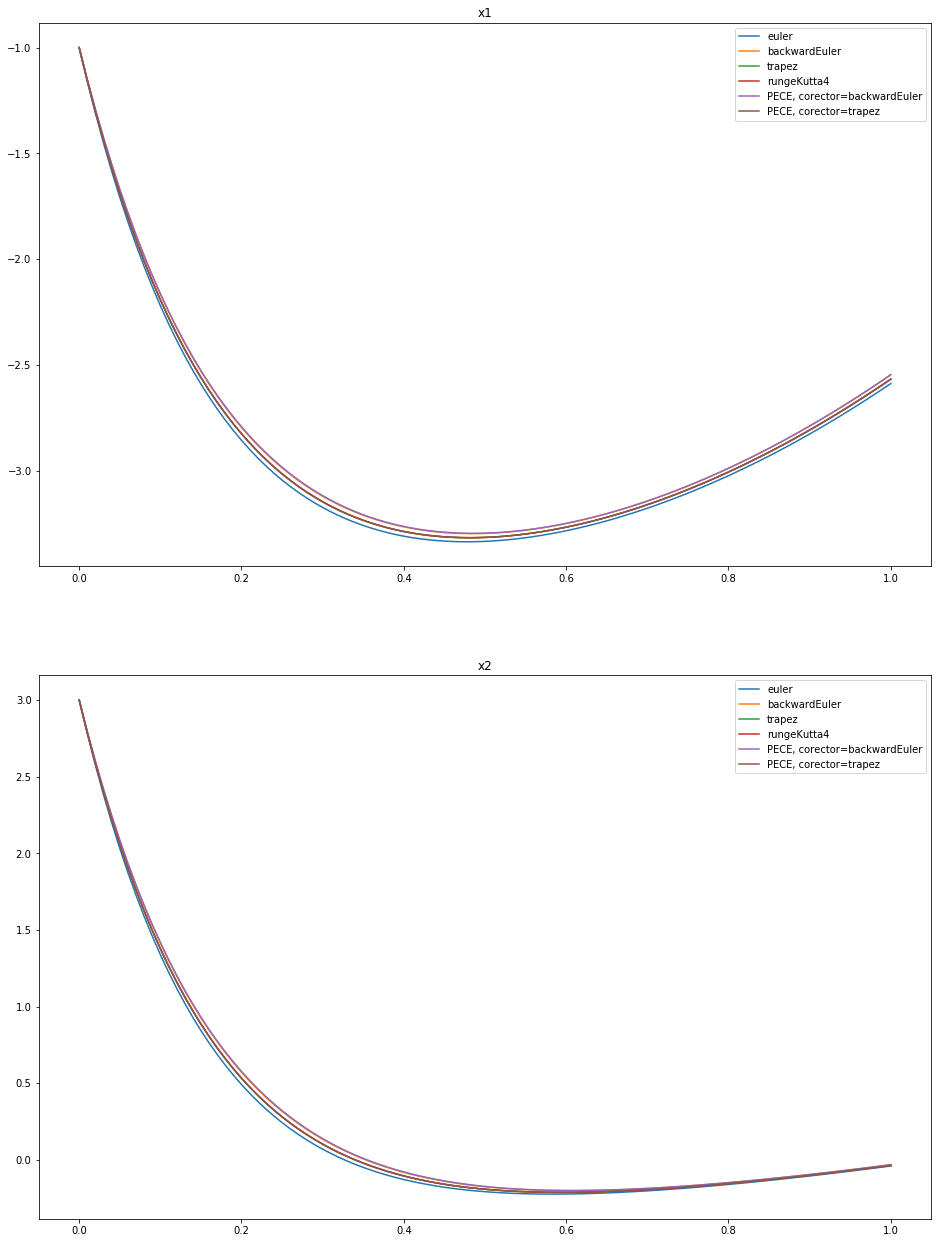

In [75]:
#ZAD4
plt.figure(figsize=(16,22))
A = Matrix.fromArray([[1, -5], [1, -7]])
B = Matrix.fromArray([[5, 0], [0, 3]])
r = [lambda t:t, lambda t:t]
x0 = Matrix.fromArray([[-1, 3]])
t_max = 1
T = 0.01
printing = 10

tss = np.arange(0,t_max + T, T)



methods = [euler, backwardEuler, trapez, rungeKutta4]
corectors = ["backwardEuler", "trapez"]

for m in methods:
    print("\nmethod={}\n".format(m.__name__))
    
    x1, x2, ts = m(T, t_max, x0, A, B, r=r, printing=printing, outputFile="zadatak4-{}".format(m.__name__))
    
    
    x1_error = sum([abs(x1m - x1a) for (x1m,x1a) in zip(x1,x1_actual)])
    x2_error = sum([abs(x2m - x2a) for (x2m,x2a) in zip(x2,x2_actual)])
    
    plt.subplot(2,1,1)
    plt.title("x1")
    plt.plot(tss, x1, label="{}".format(m.__name__))
    plt.legend()
    
    
    plt.subplot(2,1,2)
    plt.title("x2")
    plt.plot(tss, x2, label="{}".format(m.__name__))
    plt.legend()
    
    
for c,n in zip(corectors, ns):
    name = "PECE, corector={}".format(c)
    print("\n{}\n".format(name))
    
    x1, x2, ts = PECE(T, t_max, x0, A, B, r=r, printing=printing, corector=c, n=n,
                      outputFile="zadatak4-{}".format(name))
    
    
    x1_error = sum([abs(x1m - x1a) for (x1m,x1a) in zip(x1,x1_actual)])
    x2_error = sum([abs(x2m - x2a) for (x2m,x2a) in zip(x2,x2_actual)])
    
    plt.subplot(2,1,1)
    plt.title("x1")
    plt.plot(tss, x1, label="{}".format(name))
    plt.legend()
    
    
    plt.subplot(2,1,2)
    plt.title("x2")
    plt.plot(tss, x2, label="{}".format(name))
    plt.legend()